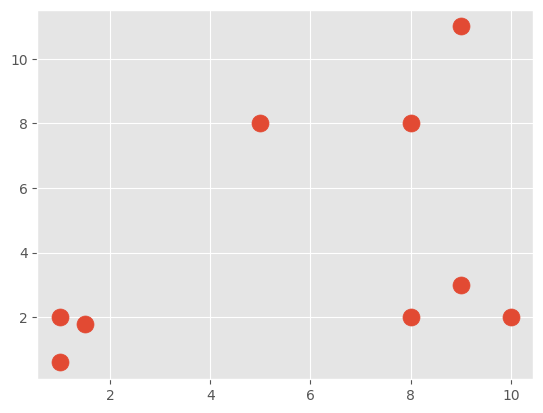

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

colors = 10*["g","r","c","b","k"]

Just like in the K Means part, this creates obvious groups. With K Means, we even told the machine that we wanted 'k' clusters (2). With Mean Shift, we're expecting that the machine just figures that out on its own, and, for us, we're expecting three groups with the code above.

We will begin our Mean Shift class:

In [2]:
class Mean_Shift:
    def __init__(self, radius=4):
        self.radius = radius

We will start with a radius of 4, since we can estimate with our dataset that a radius of four makes sense. That's all we need for now in the initialization method. Moving on to the fit method:

In [3]:
    def fit(self, data):
        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]

Here, we begin with creating starting centroids. Recall the method for Mean Shift is:

Make all datapoints centroids
Take mean of all featuresets within centroid's radius, setting this mean as new centroid.
Repeat step #2 until convergence.
So far we have done step 1. Now we need to repeat step 2 until convergence!

In [4]:
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                for featureset in data:
                    if np.linalg.norm(featureset-centroid) < self.radius:
                        in_bandwidth.append(featureset)

                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))

NameError: name 'centroids' is not defined

Here, we begin iterating through each centroid, and finding all featuresets in range. From there, we are taking the average, and setting that average as the "new centroid." Finally, we're creating a uniques variable, which tracks the sorted list of all known centroids. We use set here since there may be duplicates, and duplicate centroids are really just the same centroid.

To conclude the fit method:



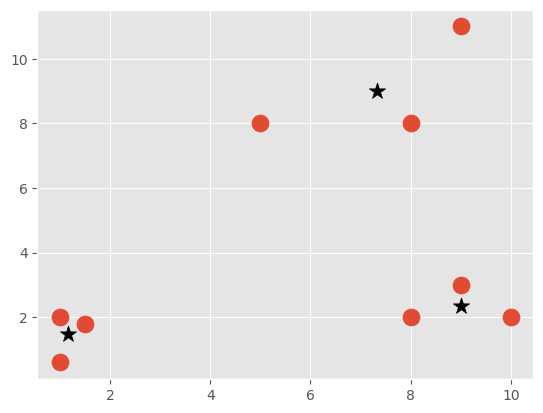

In [9]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])

##plt.scatter(X[:,0], X[:,1], s=150)
##plt.show()

colors = 10*["g","r","c","b","k"]

class Mean_Shift:
    def __init__(self, radius=4):
        self.radius = radius

    def fit(self, data):
        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]

        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                for featureset in data:
                    if np.linalg.norm(featureset-centroid) < self.radius:
                        in_bandwidth.append(featureset)

                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))

            prev_centroids = dict(centroids)

            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break

            if optimized:
                break

        self.centroids = centroids



clf = Mean_Shift()
clf.fit(X)

centroids = clf.centroids

plt.scatter(X[:,0], X[:,1], s=150)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)

plt.show()